In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('/kaggle/input/reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.Text.values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [4]:
df.shape
df= df.head(1000)
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


EDA

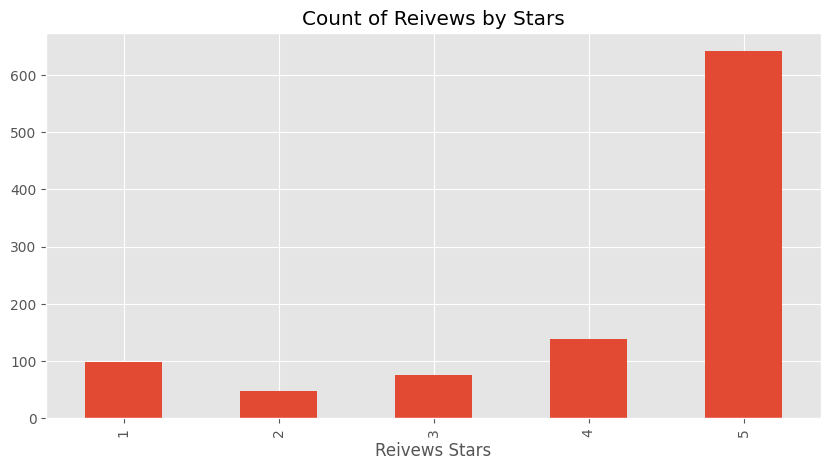

In [6]:
x = df['Score'].value_counts().sort_index() \
.plot(kind='bar',
      title = 'Count of Reivews by Stars',
      figsize=(10,5))

x.set_xlabel('Reivews Stars')
plt.show()

# ****Basic Nltk****

In [7]:
example = df['Text'][7]    ### if you are a fan of Thala
print(example)


This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!!


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'taffy', 'is', 'so', 'good', '.', 'It', 'is', 'very', 'soft']

In [9]:
nltk.pos_tag(tokens)    ##go through this link(https://gist.github.com/amnrzv/9a701f419ad004e066e2d6007dae40ad)

[('This', 'DT'),
 ('taffy', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('soft', 'JJ'),
 ('and', 'CC'),
 ('chewy', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('flavors', 'NNS'),
 ('are', 'VBP'),
 ('amazing', 'VBG'),
 ('.', '.'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ('definitely', 'RB'),
 ('recommend', 'VB'),
 ('you', 'PRP'),
 ('buying', 'VBG'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Very', 'RB'),
 ('satisfying', 'JJ'),
 ('!', '.'),
 ('!', '.')]

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('taffy', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('soft', 'JJ')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  taffy/NN
  is/VBZ
  so/RB
  good/JJ
  ./.
  It/PRP
  is/VBZ
  very/RB
  soft/JJ
  and/CC
  chewy/NN
  ./.
  The/DT
  flavors/NNS
  are/VBP
  amazing/VBG
  ./.
  I/PRP
  would/MD
  definitely/RB
  recommend/VB
  you/PRP
  buying/VBG
  it/PRP
  ./.
  Very/RB
  satisfying/JJ
  !/.
  !/.)


# VADER Sentiment Scoring

VADER(Valence Aware Dictionary and Sentiment Reasoner)

we will use NLTK SentimentIntensityAnalyzer to get neutral's(neu),negative's(neg) and positive(pos) scores of the text.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
sia.polarity_scores('i am fine!!!')

{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.3971}

In [14]:
sia.polarity_scores('the worst day in my life was happened on the day of World Earth Day')

{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.6249}

In [15]:
sia.polarity_scores(example)    ### our example was compound was completely positive 

{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}

In [16]:
## now we are checking polority scores for the whole dataset

res = {}
for i, row in tqdm(df.iterrows(),total = len(df)):
    Text =row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(Text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
res    ## store them into pandas dataframe

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how = 'left')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


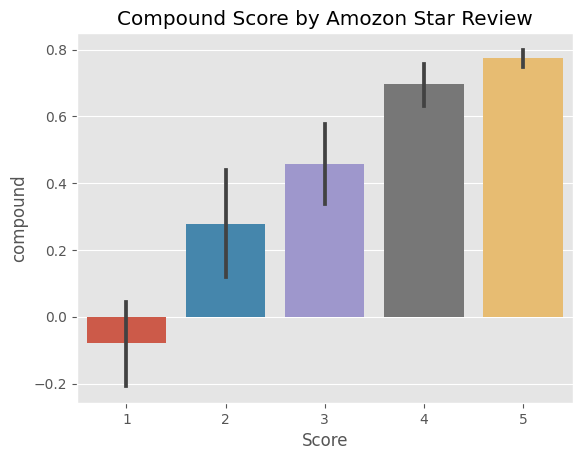

In [20]:
graph = sns.barplot(data=vaders, x = 'Score',y = 'compound')
graph.set_title('Compound Score by Amozon Star Review')
plt.show()

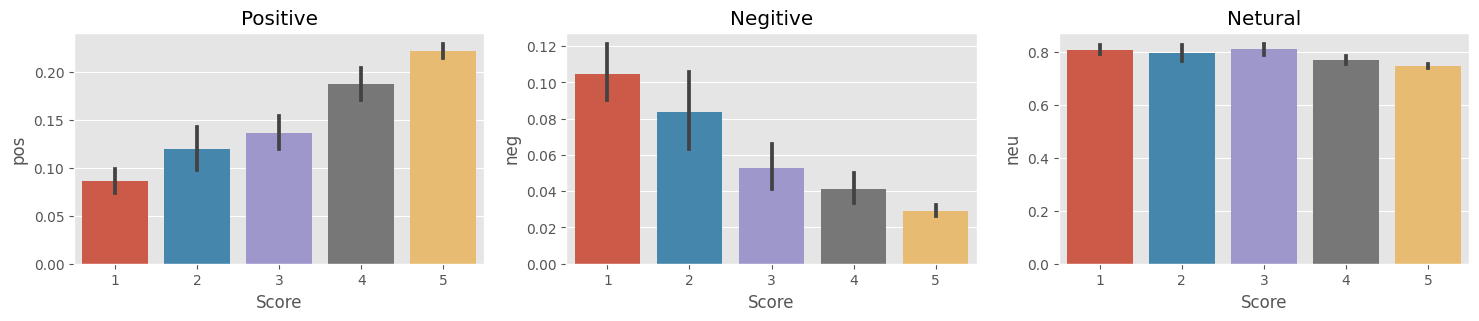

In [21]:
fig, axs= plt.subplots(1,3,figsize= (18,3))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Negitive')
axs[2].set_title('Netural')

plt.show()